In [3]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
# ruff :noqa: E402

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as ex
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split



# Background

# Dataset

In [2]:
sns.set_style("whitegrid")
%matplotlib inline


SEED : int = 31415
def set_seed(seed: int = SEED) -> None:
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)


set_seed()

In [3]:
df = pd.read_csv("data/AB_US_2023.csv")

/tmp/ipykernel_48369/3866743118.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/AB_US_2023.csv")


Here we are reading the first rows of the dataset.

In [5]:
df.head()

id                                               name  host_id  \
0   958              Bright, Modern Garden Unit - 1BR/1BTH     1169   
1  5858                                 Creative Sanctuary     8904   
2  8142  Friendly Room Apt. Style -UCSF/USF - San Franc...    21994   
3  8339                    Historic Alamo Square Victorian    24215   
4  8739                Mission Sunshine, with Private Bath     7149   

          host_name neighbourhood_group     neighbourhood  latitude  \
0             Holly                 NaN  Western Addition  37.77028   
1  Philip And Tania                 NaN    Bernal Heights  37.74474   
2             Aaron                 NaN    Haight Ashbury  37.76555   
3              Rosy                 NaN  Western Addition  37.77564   
4      Ivan & Wendy                 NaN           Mission  37.76030   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -122.43317  Entire home/apt    202               2                383   
1 -122.42089  Entire home/apt    235              30                111   
2 -122.45213     Private room     56              32                  9   
3 -122.43642  Entire home/apt    575               9                 28   
4 -122.42197     Private room    110               1                770   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2023-02-19               2.31                               1   
1  2017-08-06               0.66                               1   
2  2022-10-27               0.09                              13   
3  2019-06-28               0.17                               2   
4  2023-02-25               4.65                               2   

   availability_365  number_of_reviews_ltm           city  
0               128                     59  San Francisco  
1               365                      0  San Francisco  
2               365                      1  San Francisco  
3               365                      0  San Francisco  
4               159                     34  San Francisco

In [6]:
print(df.shape)
#print numercal data 
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_columns)
print(len(numerical_columns))
# print categorical data
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
print(categorical_columns)
print(len(categorical_columns))


(232147, 18)
['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
11
['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review', 'city']
7


The size of the data set is 232147 rows and 18 columns with 11numerical columns and 7 categorical columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [8]:
df.describe(include="all")

id                             name       host_id  \
count   2.321470e+05                           232131  2.321470e+05   
unique           NaN                           220164           NaN   
top              NaN  Presidential Suite In A Mansion           NaN   
freq             NaN                              150           NaN   
mean    2.584580e+17                              NaN  1.582248e+08   
std     3.465985e+17                              NaN  1.587164e+08   
min     6.000000e+00                              NaN  2.300000e+01   
25%     2.638896e+07                              NaN  2.299242e+07   
50%     4.896307e+07                              NaN  1.005783e+08   
75%     6.633014e+17                              NaN  2.686930e+08   
max     8.581014e+17                              NaN  5.069384e+08   

         host_name  neighbourhood_group         neighbourhood       latitude  \
count       232134                96500                232147  232147.000000   
unique       29368                   30                  1412            NaN   
top     Blueground  City of Los Angeles  Unincorporated Areas            NaN   
freq          4305                22204                 11882            NaN   
mean           NaN                  NaN                   NaN      36.610585   
std            NaN                  NaN                   NaN       5.126523   
min            NaN                  NaN                   NaN      25.957323   
25%            NaN                  NaN                   NaN      33.976225   
50%            NaN                  NaN                   NaN      36.190556   
75%            NaN                  NaN                   NaN      40.717440   
max            NaN                  NaN                   NaN      47.734010   

            longitude        room_type          price  minimum_nights  \
count   232147.000000           232147  232147.000000   232147.000000   
unique            NaN                4            NaN             NaN   
top               NaN  Entire home/apt            NaN             NaN   
freq              NaN           169142            NaN             NaN   
mean       -98.301436              NaN     259.468001       13.495867   
std         19.706929              NaN    1024.645918       27.920631   
min       -123.089130              NaN       0.000000        1.000000   
25%       -118.315111              NaN      91.000000        2.000000   
50%        -97.727670              NaN     149.000000        3.000000   
75%        -77.026222              NaN     250.000000       30.000000   
max        -70.996000              NaN  100000.000000     1250.000000   

        number_of_reviews last_review  reviews_per_month  \
count       232147.000000      183062      183062.000000   
unique                NaN        3147                NaN   
top                   NaN  2023-03-05                NaN   
freq                  NaN        5008                NaN   
mean            40.915230         NaN           1.638348   
std             80.649152         NaN           1.910812   
min              0.000000         NaN           0.010000   
25%              1.000000         NaN           0.310000   
50%              9.000000         NaN           1.000000   
75%             43.000000         NaN           2.420000   
max           3091.000000         NaN         101.420000   

        calculated_host_listings_count  availability_365  \
count                    232147.000000     232147.000000   
unique                             NaN               NaN   
top                                NaN               NaN   
freq                               NaN               NaN   
mean                         29.879055        180.985686   
std                         106.013665        134.715299   
min                           1.000000          0.000000   
25%                           1.000000         52.000000   
50%                           2.000000        175.000000   
75%   

### Visualization
- Firstly we did some steps to prepare our dataset for visualization

1) dropped all rows with price negative or null

In [9]:
df_vis = df.drop(columns=["name", "id", "host_name", "host_id"])
# drop rows with missing price or price == 0
df_vis = df_vis.dropna(subset=["price"])
df_vis = df_vis[df_vis["price"] > 0]


2) Visualize the missing values in our dataset and we found that the columns with significant number of missing values are:
    - last reviews
    - reviews per month
    - neighbourhood_group


<Axes: >

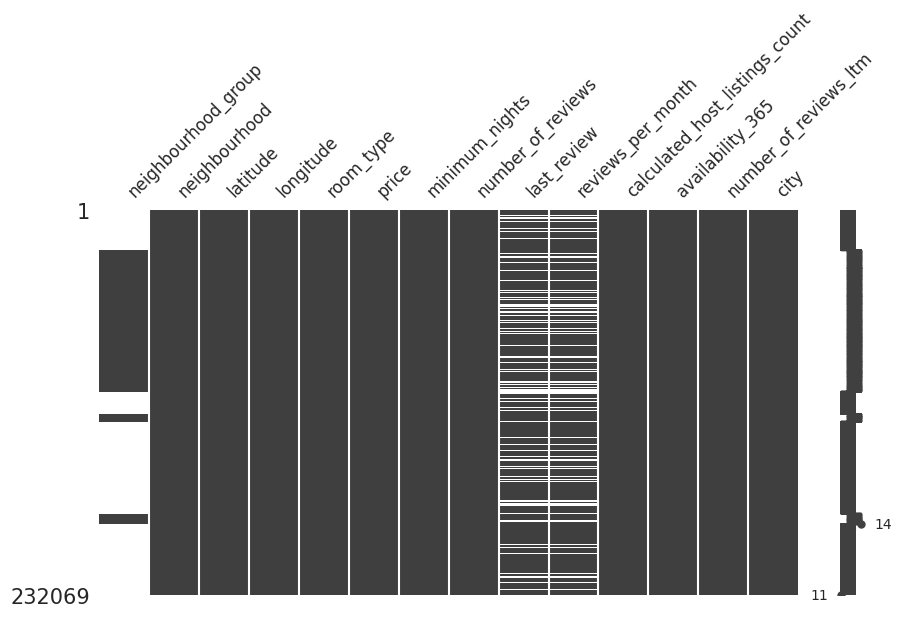

In [10]:
import missingno as msno

msno.matrix(df_vis, figsize=(10, 5), fontsize=12)

3) Scatter plot between all pairs of numeric values 

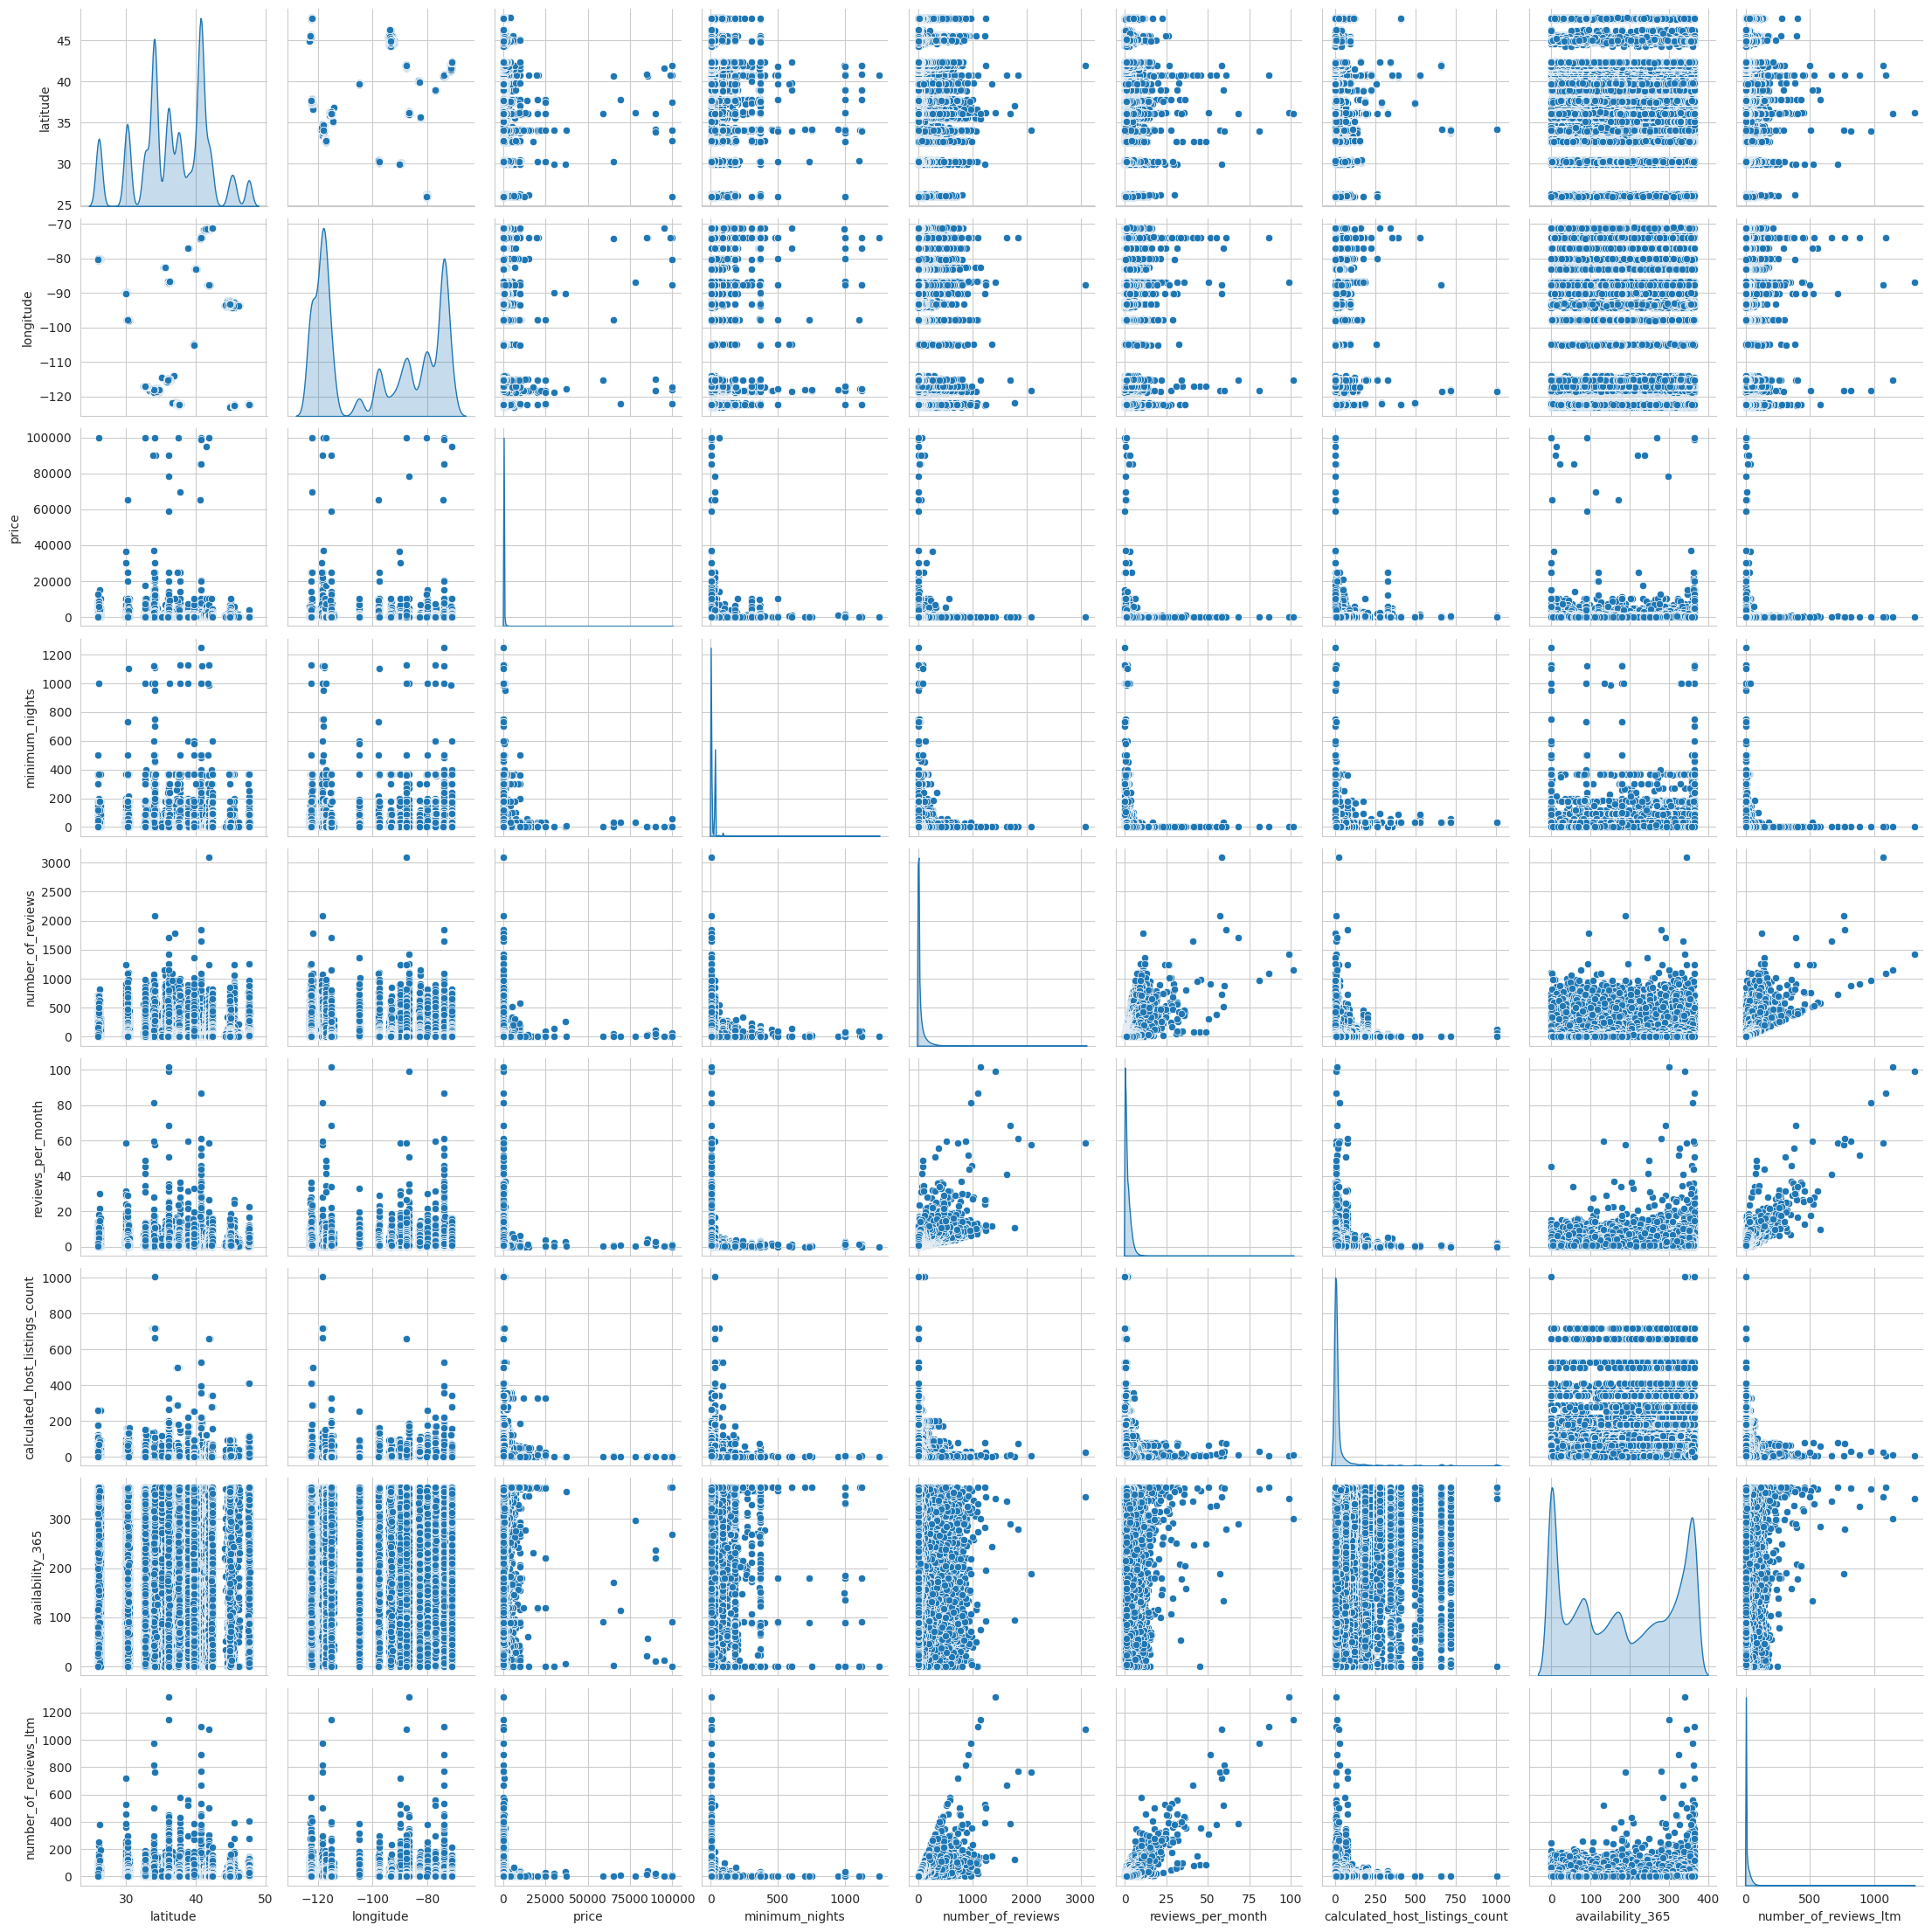

In [11]:
# plot scatter plot between all pairs of numerical columns
numerical_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
sns.pairplot(df_vis[numerical_columns], diag_kind="kde")


4) Distribution of price using histogram and violin plot


<Axes: xlabel='price', ylabel='Count'>

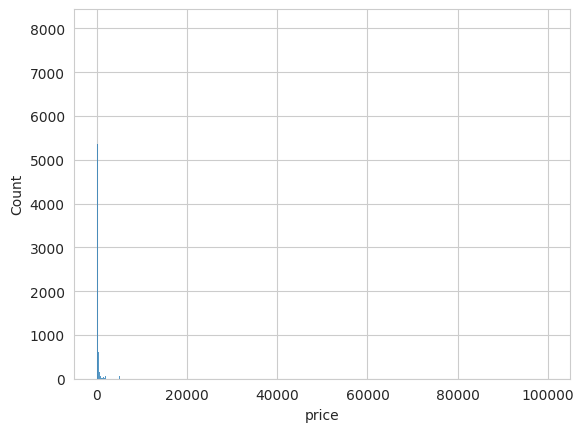

In [12]:
sns.histplot(df_vis["price"], legend=True, label="price", cbar=True)

<Axes: xlabel='price'>

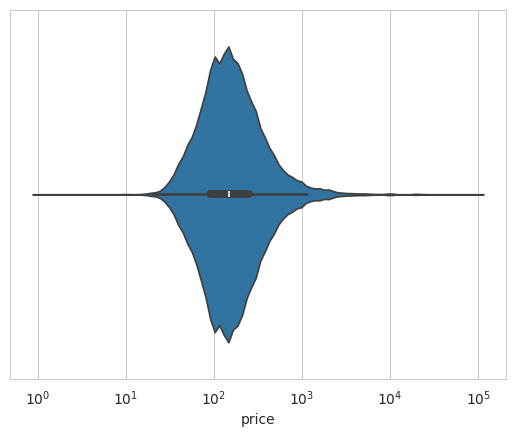

In [13]:
#plot violin for price showing the median , inter quartile range 
sns.violinplot(x="price", data=df_vis, log_scale=True)


we found that there is an outlier that makes the histogram of price large in the scale of X axis so we diceded to plot on a small range 

<Axes: xlabel='price', ylabel='Count'>

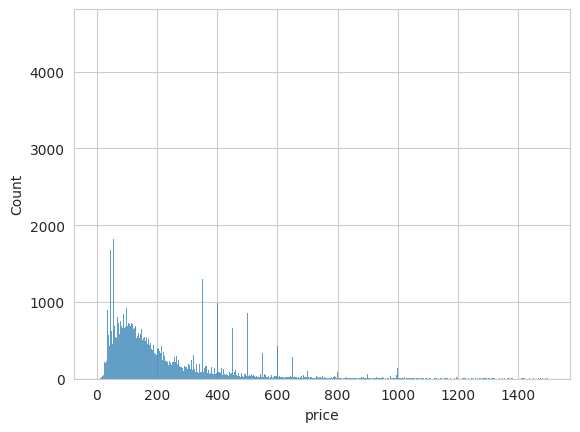

In [14]:
#plot histogram for price from range 0 to 1500 
sns.histplot(df_vis["price"], legend=True, label="price", cbar=True, bins=range(0, 1500))

5) Numerical columns distribution using violin plot

<Axes: xlabel='latitude', ylabel='Count'>

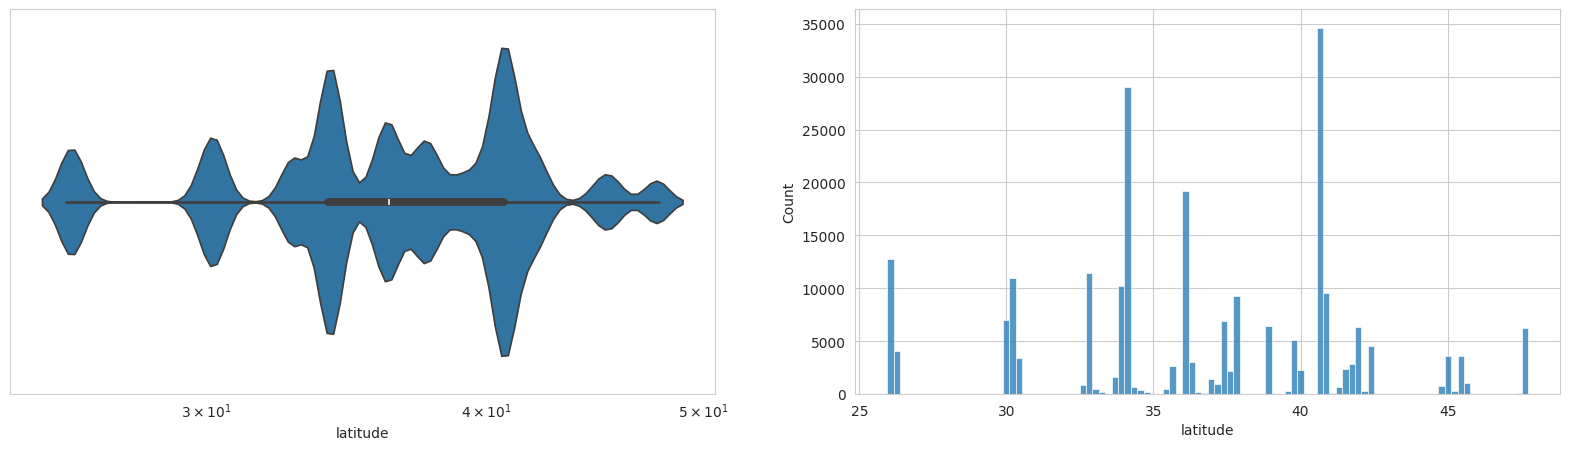

In [15]:
numerical_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.violinplot(x="latitude", data=df_vis, log_scale=True, ax=ax[0])
sns.histplot(df_vis["latitude"], legend=True, label="latitude", cbar=True, ax=ax[1])


<Axes: xlabel='longitude', ylabel='Count'>

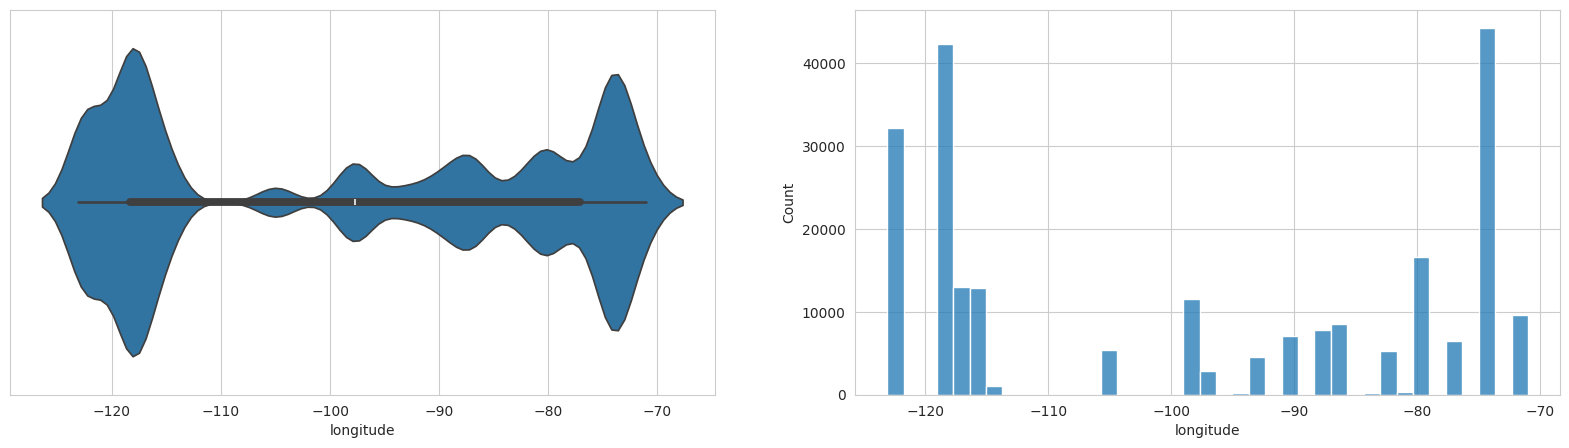

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.violinplot(x="longitude", data=df_vis, ax=ax[0])
sns.histplot(df_vis["longitude"], legend=True, label="longitude", cbar=True, ax=ax[1])

0


<Axes: xlabel='number_of_reviews', ylabel='Count'>

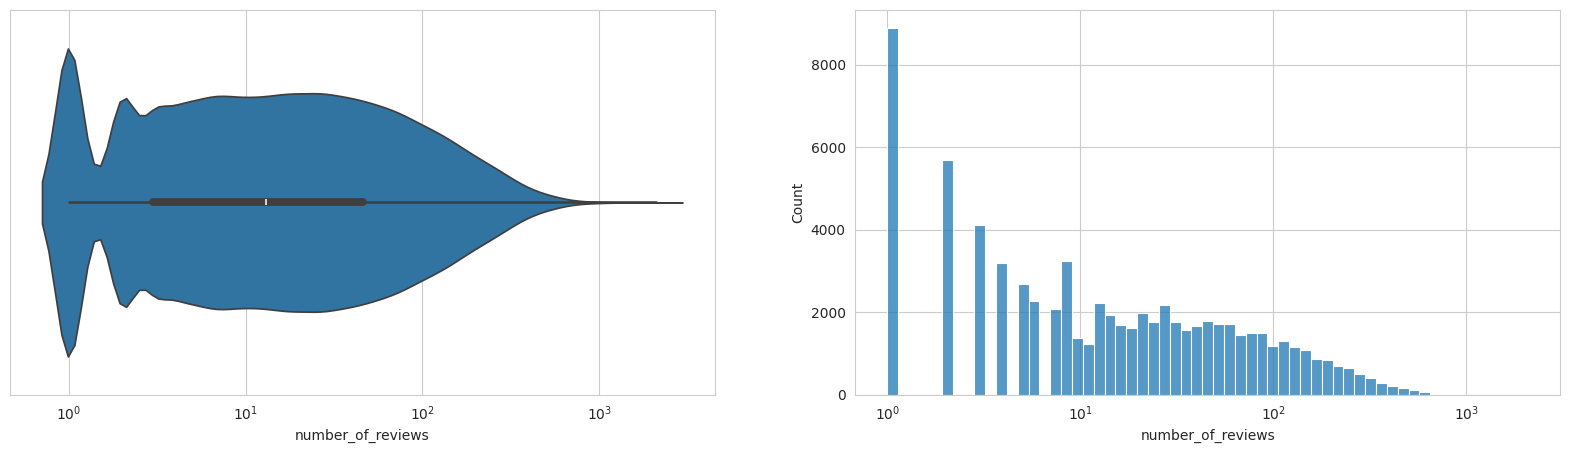

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

df_vis1 = df_vis.dropna()
#print number of nan values in number_of_reviews column
print(df_vis1["number_of_reviews"].isna().sum())
sns.violinplot(x="number_of_reviews", data=df_vis1, log_scale=True, ax=ax[0])
sns.histplot(df_vis1["number_of_reviews"], legend=True, label="number_of_reviews", cbar=True, ax=ax[1], log_scale=True)

<Axes: xlabel='availability_365', ylabel='Count'>

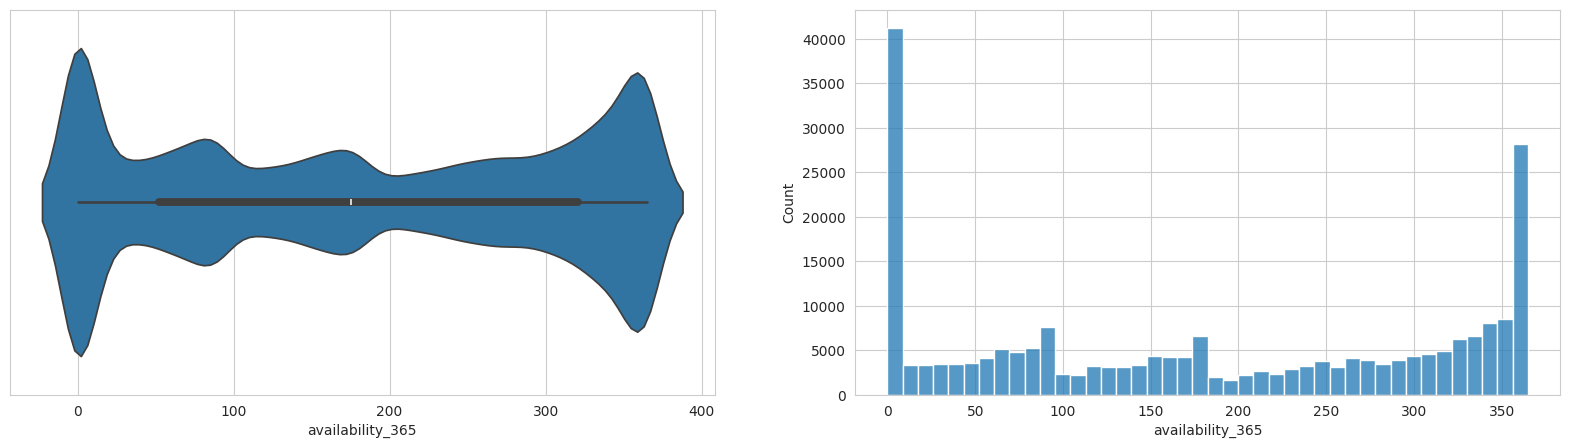

In [16]:
#plot violin and histogram for availability_365 beside eachother 
# drop nan values and infs
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.violinplot(x="availability_365", data=df_vis, ax=ax[0])
sns.histplot(df_vis["availability_365"], legend=True, label="availability_365", cbar=True, ax=ax[1])


1250


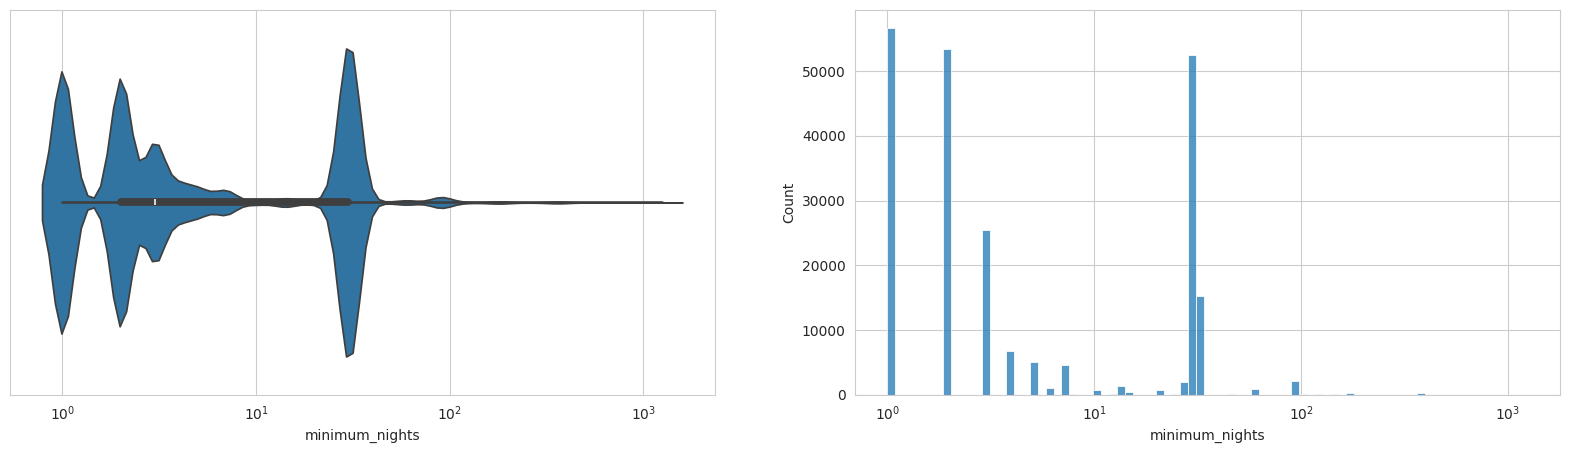

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.violinplot(x="minimum_nights", data=df_vis, ax=ax[0], log_scale=True)
sns.histplot(df_vis["minimum_nights"], legend=True, label="minimum_nights", cbar=True, ax=ax[1],log_scale=True)

# print maximum value
print(df_vis["minimum_nights"].max())

it seems that minmum_nights column as well as price has some outliers that should be removed 

6) correlation between numerical columns

<Axes: >

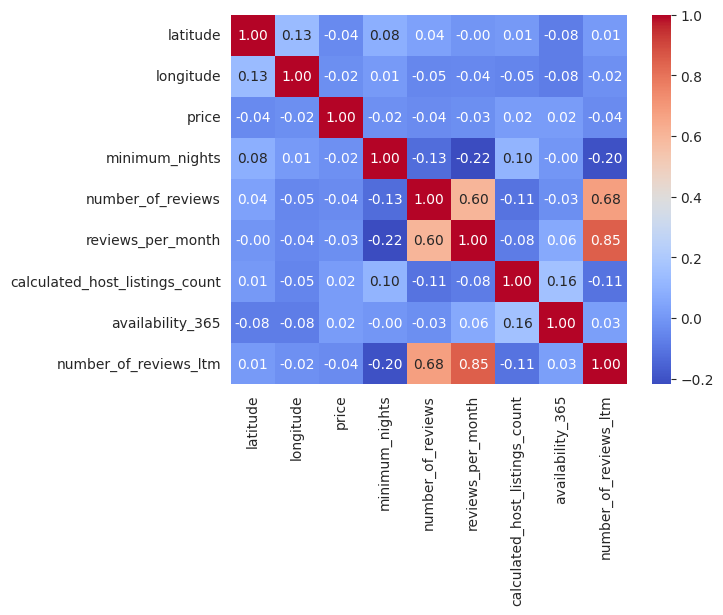

In [16]:
numerical_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
# plot heatmap for numerical columns
sns.heatmap(df_vis[numerical_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")

7) Analysis of categorical columns

        Room Type

<Axes: xlabel='room_type', ylabel='price'>

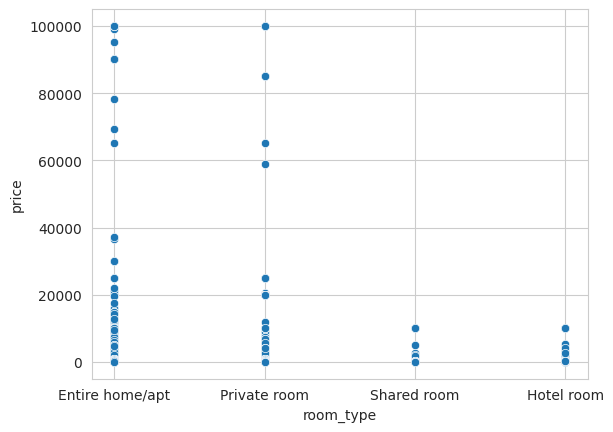

In [17]:
#plot price against room type
sns.scatterplot(x="room_type", y="price", data=df_vis)

In [18]:
info = df_vis.groupby("room_type").agg({"price": ["mean", "median", "std", "min", "max"]})
print(info)

                      price                                
                       mean median          std min     max
room_type                                                  
Entire home/apt  282.002188  177.0   870.604812   1  100000
Hotel room       803.423292  254.0  1259.686964  22   10000
Private room     193.999615   75.0  1374.945356   5  100000
Shared room       99.217047   42.0   456.720061  11   10000


Since there is alot of outliers in the price we can compare between median of the 4 categories and we could found that Hotel room tends to be more expensive than other categories

     City
 

/tmp/ipykernel_2713/3806700428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df_vis['city'],order=df_vis['city'].value_counts().index,palette='rocket')


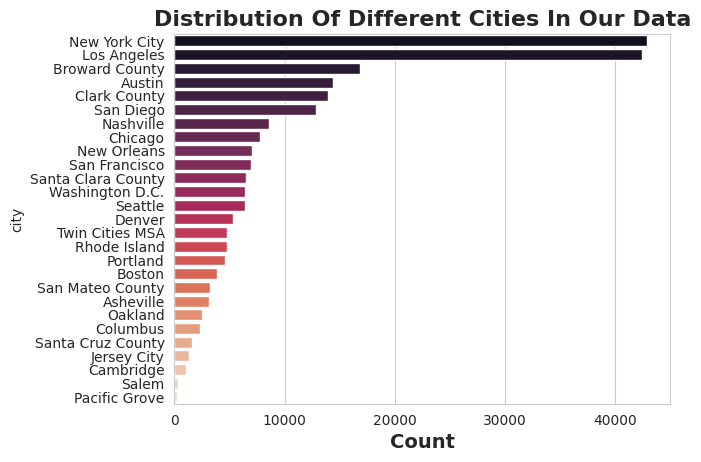

In [19]:
#Distribution of different cities 
ax = sns.countplot(y=df_vis['city'],order=df_vis['city'].value_counts().index,palette='rocket')
ax.set_title('Distribution Of Different Cities In Our Data',fontsize=16,fontweight='bold')
ax.set_xlabel('Count',fontsize=14,fontweight='bold')
#ax.set_title()
plt.show()

In [20]:
states_dic = {'Asheville':'NC','Austin':'TX','Boston':'MA','Broward County':'FL','Cambridge':'MA','Chicago':'IL','Clark County':'NV','Columbus':'OH','Denver':'CO','Hawaii':'HI','Jersey City':'NJ',
             'Los Angeles':'SC','Nashville':'TN','New Orleans':'MS','New York City':'NY','Oakland':'CA','Pacific Grove':'CA','Portland':'OR','Rhode Island':'RI','Salem':'MA','San Clara Country':'CA',
             'Santa Cruz County':'CA','San Diego':'CA','San Francisco':'CA','San Mateo County':'CA','Seattle':'WA','Twin Cities MSA':'MN','Washington D.C.':'DC', 'Santa Clara County':'CA'}

df_vis['state'] = df_vis['city'].apply(lambda x : states_dic[x])


In [21]:
## group by state and price mean
g_dat = df_vis.groupby(by='state').agg('price').mean()

#g_dat = g_dat.reset_index()
fig = ex.choropleth(g_dat,locations=g_dat.index,color='price', locationmode="USA-states", scope="usa",title='Average Listing Price At Each State', color_continuous_scale=ex.colors.diverging.Portland)
fig.show()

# Objective/Goal


# Methodology

## Data Cleaning/Preprocessing

### Remove Unnecessary Columns
- host_name: An alomst unqiue column showing the name of the host. Unrelated to the regression as there is another column called `calculated_host_listings_count` that shows how many listings this host has done.
- host_id: A unique numbering for the host done by the original database and unrelated to the prediction.
- id: A unique numbering done by the original database and unrelated to the prediction.
- name: A description for the listings. Analyzing it would require more deep learning methods.

In [4]:
## remove unnecessary columns
unnecessary_columns = [
    "host_name",
    "host_id",
    "id",
    "name"
]

df = df.drop(columns=unnecessary_columns)
print("New shape: ", df.shape)

New shape:  (232147, 14)


### Handling Missing Values 
The folllowing are the missing values analysis: 

<Axes: >

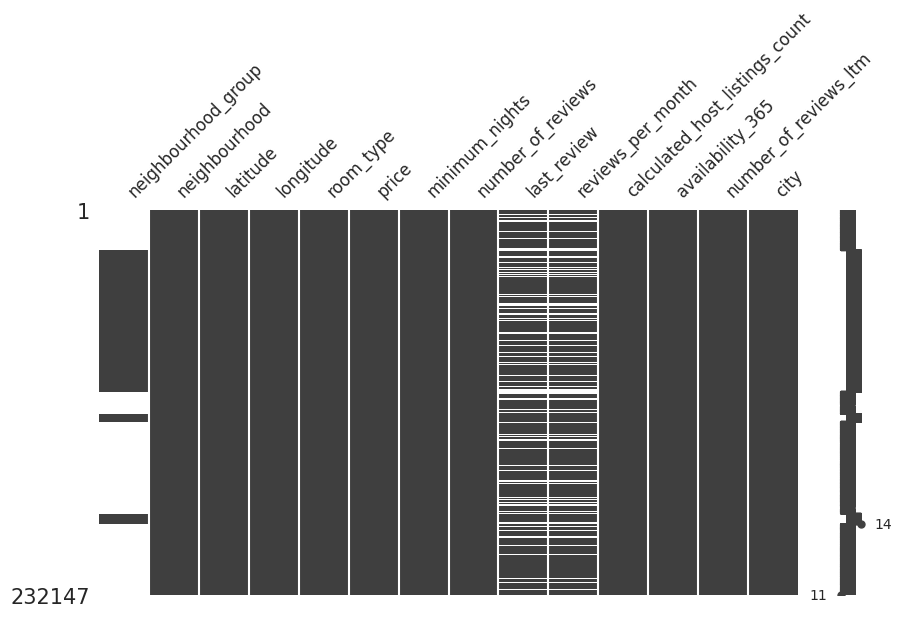

In [5]:
import missingno as msno

msno.matrix(df, figsize=(10, 5), fontsize=12)

In [6]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / df.shape[0]
missing_values


neighbourhood_group    0.584315
last_review            0.211439
reviews_per_month      0.211439
dtype: float64

In [7]:
# Completely remove columns with more than 50% missing values
df = df.drop(columns=missing_values[missing_values > 0.5].index)
print ("New shape: ", df.shape)

New shape:  (232147, 13)


In [8]:
# get number of reviews for rows with missing reviews_per_month and last_review
df[df["reviews_per_month"].isnull()]["number_of_reviews"].value_counts()

number_of_reviews
0    49085
Name: count, dtype: int64

We can see that the reason why reviews_per_month or last_review is null is because the host has never received a review. Therefore, we can replace the null values with 0 or the mode in the case of last_review.

In [9]:
df["reviews_per_month"].fillna(0, inplace=True)

There is no proper way to handle missing values of `last_review` since it's a datetime component. The number of rows that has this feature missing is around 20% of the data. Thus, it's more logical to sacrifice the feature.

In [10]:
# drop feature last_review
df = df.drop(columns=["last_review"])
print("New shape: ", df.shape)

New shape:  (232147, 12)


<Axes: >

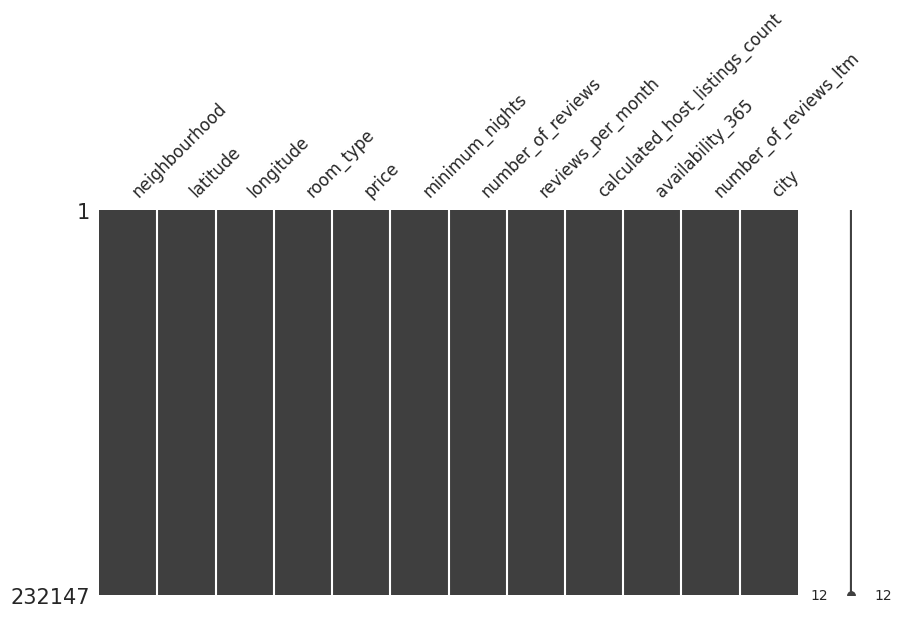

In [10]:
import missingno as msno

msno.matrix(df, figsize=(10, 5), fontsize=12)

### Remove duplicate rows

In [11]:
# remove duplicates
cnt = df.duplicated(subset=df.columns.difference(["id"])).sum()
df = df.drop_duplicates(subset=df.columns.difference(["id"]))
print(f"Removed {cnt} duplicates.")

Removed 786 duplicates.


In [12]:
# Remove zeros from price and print their count
cnt = df[df["price"] == 0].shape[0]
df = df[df["price"] > 0]
print(f"Removed {cnt} rows with price = 0.")

Removed 78 rows with price = 0.


### Outlier Removal

From the visulizations done above, we can see that there's outliers in the following columns: 
1. price
2. minimum_nights
3. number_of_reviews

#### Price

<Axes: xlabel='price'>

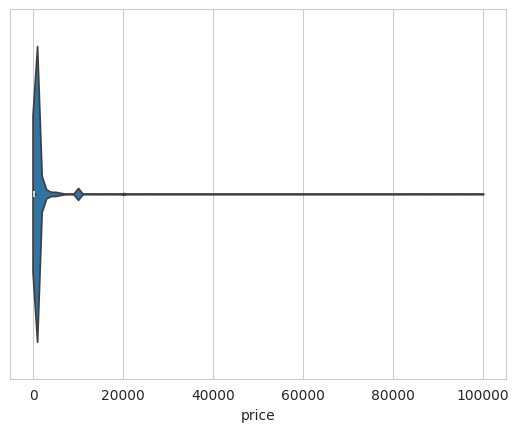

In [13]:
# remove outliers for price
# boxplot
sns.violinplot(x="price", data=df)

In [119]:
df.shape

(232069, 18)

In [14]:
# Remove outliers from price using IQR on log
# calculate IQR
q25, q75 = np.percentile(np.log(df["price"]), 25), np.percentile(np.log(df["price"]), 75)
iqr = q75 - q25
print("Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f" % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print("Cut Off: %.3f" % cut_off)

# identify outliers
outliers = [x for x in np.log(df["price"]) if x < lower or x > upper]
print("Identified outliers: %d" % len(outliers))

# remove outliers
df = df[(np.log(df["price"]) > lower) & (np.log(df["price"]) < upper)]

df.shape

Percentiles: 25th=4.500, 75th=5.521, IQR=1.022
Cut Off: 1.532
Identified outliers: 4872


(226411, 12)

<Axes: xlabel='price'>

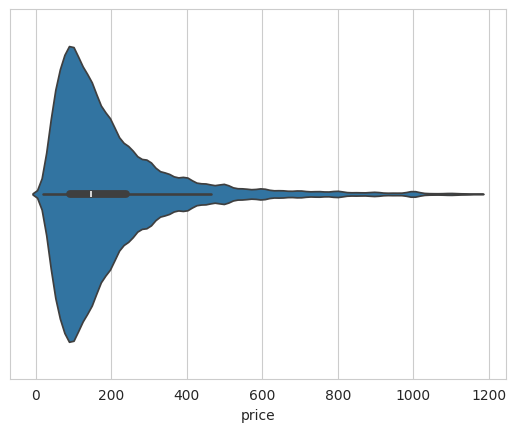

In [18]:
# boxplot
sns.violinplot(x=df["price"])

#### Number of Reviews


<Axes: xlabel='number_of_reviews'>

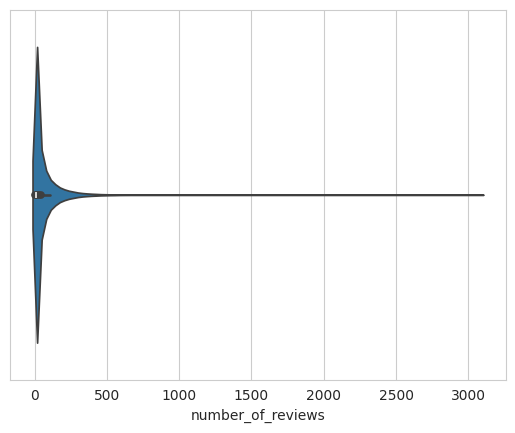

In [124]:
# violinplot
sns.violinplot(x=df["number_of_reviews"])

IQR removal will remove alot of rows and we think that number of reviews is important feature and the outliers are not wrong values so we will only the extreme ones.

In [15]:
# Count and remove all rows with number_of_reviews > 500
print("Number of rows removed with number_of_reviews > 500: ", df[df["number_of_reviews"] > 500].shape[0])
df = df[df["number_of_reviews"] <= 500]

Number of rows removed with number_of_reviews > 500:  1017


<Axes: xlabel='number_of_reviews'>

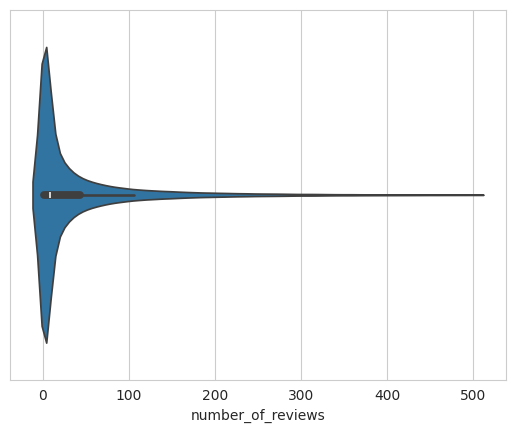

In [142]:
# violinplot
sns.violinplot(x=df["number_of_reviews"])


#### Minimum Nights

<Axes: xlabel='minimum_nights'>

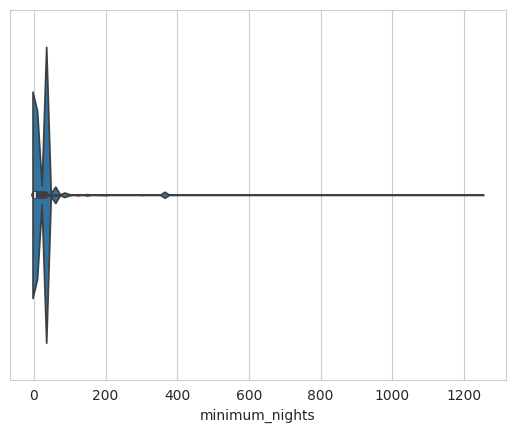

In [144]:
sns.violinplot(x=df["minimum_nights"])

In [16]:
# use interquartile range to remove outliers
q1 = df["minimum_nights"].quantile(0.25)
q3 = df["minimum_nights"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("Bounds for removing outliers of minimum_nights: ", lower_bound, upper_bound)

# print number of outliers
print("Number of outliers: ", df[(df["minimum_nights"] < lower_bound) | (df["minimum_nights"] > upper_bound)].shape[0])

# remove outliers
df = df[(df["minimum_nights"] > lower_bound) & (df["minimum_nights"] < upper_bound)]


Bounds for removing outliers of minimum_nights:  -40.0 72.0
Number of outliers:  3589


<Axes: xlabel='minimum_nights'>

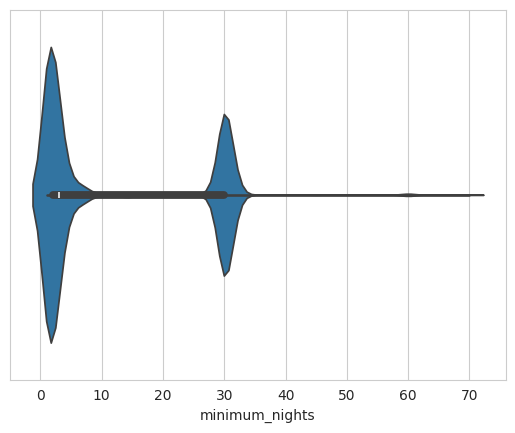

In [148]:
# violinplot
sns.violinplot(x=df["minimum_nights"])

## Encoding

In [18]:
# Drop neighbourhood column
df = df.drop(columns=["neighbourhood"])

In [19]:
# Print categorical columns
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
print(categorical_columns)

['room_type', 'city']


In [20]:
# Do one-hot encoding for categorical columns
df = pd.get_dummies(df, columns=categorical_columns)
print("New shape: ", df.shape)

New shape:  (221805, 40)


### Cross Validation Prep

In [21]:
X, y = df.drop(columns=["price"]), df["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

### Model Training

In [22]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn import metrics

def print_evaluation(true, pred):
    print('MSE: ', mse(true, pred))
    print('R2: ', r2_score(true, pred))
    print('RMSE: ', np.sqrt(mse(true, pred)))
    print('MAE: ', metrics.mean_absolute_error(true, pred))

def plot_actual_vs_predicted(true, pred):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(true, label='Actual')
    sns.kdeplot(pred, label='Predicted')
    plt.legend()
    plt.show()

#### Random Forest

MSE:  25157.50702093413
R2:  0.11156924210890373
RMSE:  158.61118189123403
MAE:  113.41931058394431


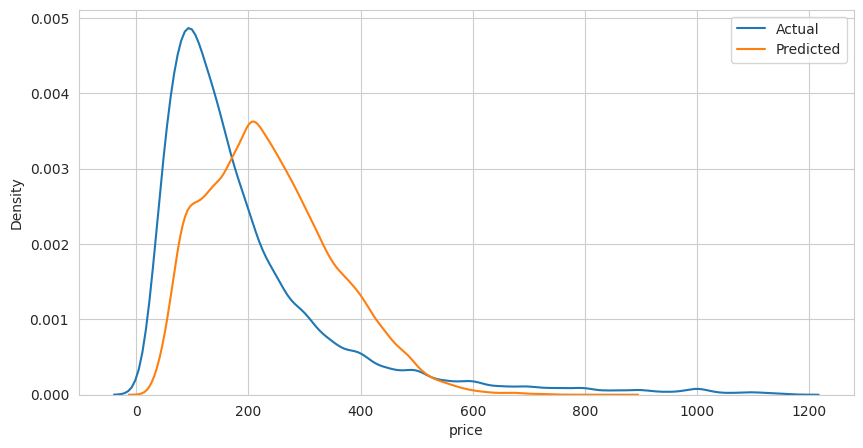

In [28]:
# Random Forst With PCA
from sklearn.ensemble import RandomForestRegressor 

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=10)),
        ("rf", RandomForestRegressor(
            n_jobs=-1))
    ]
)

pipeline.fit(X_train, y_train)

# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)

In [ ]:
# Random Forst Without PCS
from sklearn.ensemble import RandomForestRegressor 

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("rf", RandomForestRegressor(
            n_jobs=-1))
    ]
)

pipeline.fit(X_train, y_train)

# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)

#### K Nearest Neighbour

In [32]:
# Using KNN with PCA & search for good params
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA()),
        ("knn", KNeighborsRegressor())
    ]
)

params = {
    "knn__n_neighbors": [3, 5, 7, 10],
    "knn__weights": ["uniform", "distance"],
    "pca__n_components": [5, 10, 20],
    "knn__p": [1, 2]
}

grid = RandomizedSearchCV(pipeline, params, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# evaluate on test data
y_pred = grid.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV 1/5; 1/10] START lgbm__learning_rate=0.01, lgbm__max_depth=5, lgbm__n_estimators=100, pca__n_components=30
[CV 3/5; 1/10] START lgbm__learning_rate=0.01, lgbm__max_depth=5, lgbm__n_estimators=100, pca__n_components=30
[CV 2/5; 1/10] START lgbm__learning_rate=0.01, lgbm__max_depth=5, lgbm__n_estimators=100, pca__n_components=30
[CV 4/5; 1/10] START lgbm__learning_rate=0.01, lgbm__max_depth=5, lgbm__n_estimators=100, pca__n_components=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be

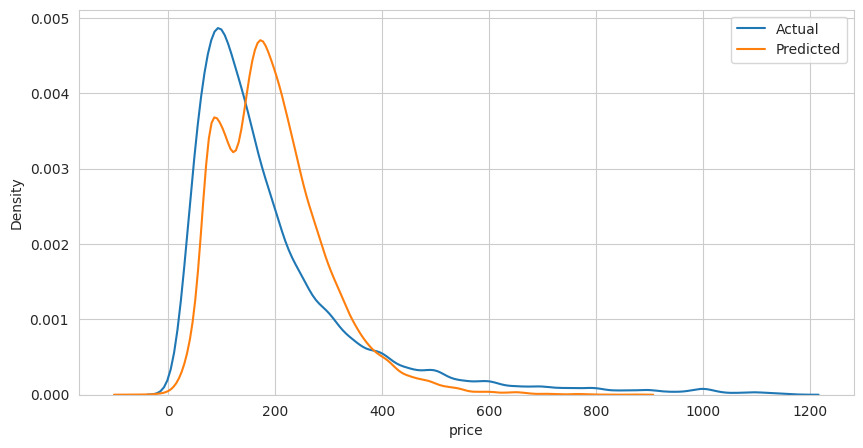

In [29]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA()),
        ("lgbm", LGBMRegressor())
    ]
)

param_grid = {
    "lgbm__n_estimators": [100, 200, 300],
    "lgbm__max_depth": [3, 5, 7],
    "pca__n_components": [10, 20, 30],
    "lgbm__learning_rate": [0.01, 0.1, 0.5],
}

search = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=10,
    cv=5,
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train)

# evaluate on test data
y_pred = search.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START pca__n_components=30, xgb__gamma=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__reg_lambda=10.0, xgb__scale_pos_weight=1
[CV 2/5; 1/10] START pca__n_components=30, xgb__gamma=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__reg_lambda=10.0, xgb__scale_pos_weight=1
[CV 3/5; 1/10] START pca__n_components=30, xgb__gamma=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__reg_lambda=10.0, xgb__scale_pos_weight=1
[CV 4/5; 1/10] START pca__n_components=30, xgb__gamma=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__reg_lambda=10.0, xgb__scale_pos_weight=1
[CV 4/5; 1/10] END pca__n_components=30, xgb__gamma=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__reg_lambda=10.0, xgb__scale_pos_weight=1;, score=(train=-23924.533, test=-24007.363) total time=   5.2s
[CV 5/5; 1/10] START pc

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)


MSE:  19757.81380394516
R2:  0.3022579909247948
RMSE:  140.56249074324614
MAE:  89.30382628099146


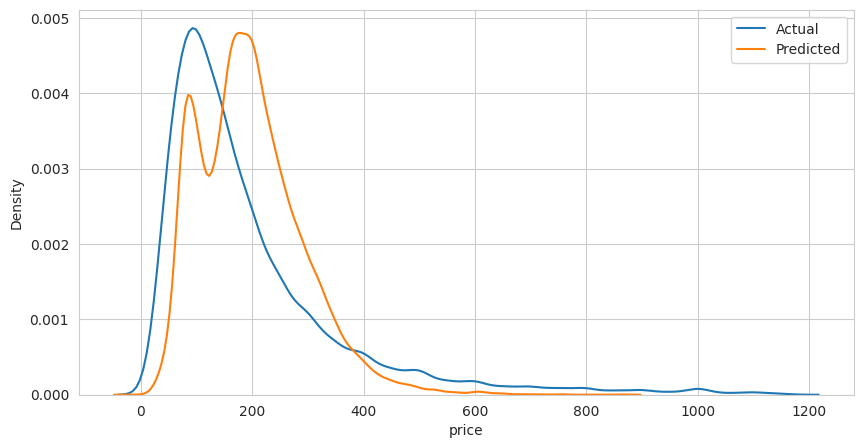

In [30]:
import xgboost as xgb

# pipeline = Pipeline(
#     [
#         ("scaler", StandardScaler()),
#         # ("pca", PCA()),
#         ("xgb", xgb.XGBRegressor())
#     ]
# )

# pipeline.fit(X_train, y_train)

# # evaluate on test data
# y_pred = pipeline.predict(X_test)
# print_evaluation(y_test, y_pred)
# plot_actual_vs_predicted(y_test, y_pred)

# Use RandomizedSearchCV to find best hyperparameters for XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA()),
        ("xgb", xgb.XGBRegressor())
    ]
)

param_grid = {
    'xgb__n_estimators': [100, 500, 1000],
    'xgb__max_depth': [3, 5, 10],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__gamma': [0, 0.25, 1.0],
    'xgb__reg_lambda': [0, 1.0, 10.0],
    'xgb__scale_pos_weight': [1, 3, 5],
    'pca__n_components': [10, 20, 30, 40],
}

search = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train)

# evaluate on test data
y_pred = search.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)

# Clustering

In [180]:
# select features to cluster
cluster_df = df[["latitude", "longitude"]]

Text(0, 0.5, 'WCSS')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

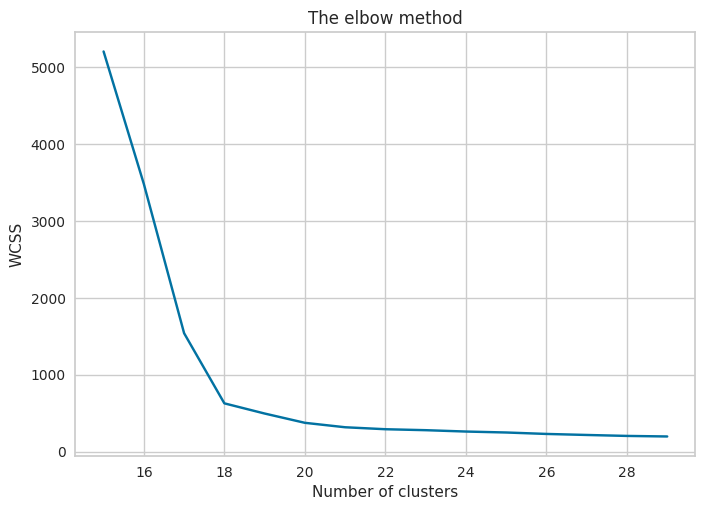

In [183]:
from sklearn.cluster import KMeans

scaled_df = cluster_df

# sample scaled_df randomly
scaled_df = scaled_df.sample(frac=0.1, replace=False, random_state=SEED)

# test kmeans using elbow method
wcss = []

for i in range(15, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(15, 30), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares


processing: i=5


processing: i=6
processing: i=7
processing: i=8
processing: i=9
processing: i=10
processing: i=11
processing: i=12
processing: i=13
processing: i=14
processing: i=15
processing: i=16
processing: i=17
processing: i=18
processing: i=19
processing: i=20
processing: i=21
processing: i=22
processing: i=23
processing: i=24
processing: i=25
processing: i=26
processing: i=27
processing: i=28
processing: i=29
processing: i=30
processing: i=31
processing: i=32
processing: i=33
processing: i=34
processing: i=35
processing: i=36
processing: i=37
processing: i=38
processing: i=39


Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

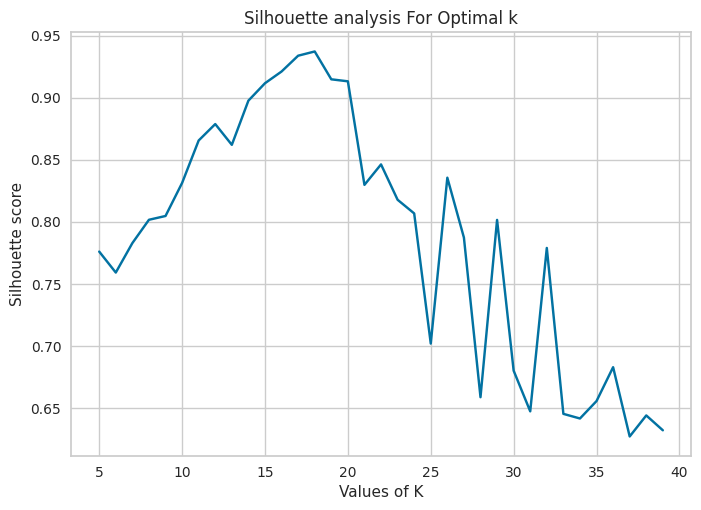

In [184]:
from sklearn.metrics import silhouette_score

avg_silhouette = []

for i in range(5, 40):
    print(f"processing: {i=}")
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(scaled_df, cluster_labels))

plt.plot(range(5, 40),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

Silhouetter Score: 0.937


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not fo

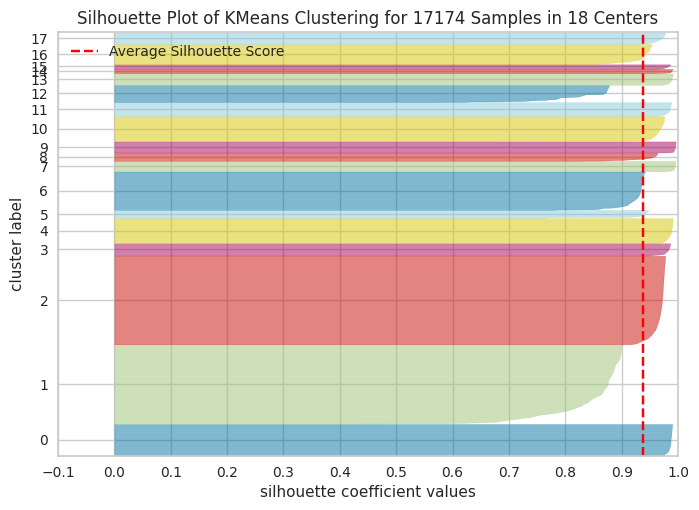

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 17174 Samples in 18 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [185]:
from yellowbrick.cluster import SilhouetteVisualizer

km = KMeans(n_clusters=18, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = km.fit_predict(scaled_df)
clusters = km.labels_

# calculate silhouette score on a sample of 10000 rows
score = silhouette_score(scaled_df, clusters)

print('Silhouetter Score: %.3f' % score)

visualizer = SilhouetteVisualizer(km, colors='yellowbrick') #, ax=ax[q-1][mod])
visualizer.fit(scaled_df)
visualizer.show()

In [187]:
import folium

km = KMeans(n_clusters=18, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = km.fit_predict(cluster_df)
clusters = km.labels_
cluster_map = folium.Map([41.8781, -87.6298], zoom_start=4)
for i in range(km.cluster_centers_.shape[0]):
    num = sum(km.labels_ == i)
    folium.CircleMarker([km.cluster_centers_[i,0], km.cluster_centers_[i,1]],
                        radius=15,
                        popup=str(num) + ' Listings Associated with this Cluster',
                        fill_color="#3db7e4",
                        ).add_to(cluster_map)

cluster_map